# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


In [3]:
requests.get("https://api.openweathermap.org/data/2.5/weather?q=Dallas&appid=4af0de2ca2c8c225a8a4dc8666c7221d").json()

{'coord': {'lon': -96.7836, 'lat': 32.7668},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 291.94,
  'feels_like': 290.84,
  'temp_min': 290.63,
  'temp_max': 293.44,
  'pressure': 1023,
  'humidity': 37},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 10},
 'clouds': {'all': 0},
 'dt': 1697491951,
 'sys': {'type': 2,
  'id': 2075302,
  'country': 'US',
  'sunrise': 1697459495,
  'sunset': 1697500411},
 'timezone': -18000,
 'id': 4684904,
 'name': 'Dallas',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | queenstown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | tual
Processing Record 12 of Set 1 | veraval
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | st. john's
Processing Record 15 of Set 1 | mugia
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | poronaysk
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | tandil
Processing Record 22 of Set 1 

Processing Record 43 of Set 4 | pandan
Processing Record 44 of Set 4 | bardai
Processing Record 45 of Set 4 | barclayville
Processing Record 46 of Set 4 | inirida
Processing Record 47 of Set 4 | at taj
Processing Record 48 of Set 4 | dryden
Processing Record 49 of Set 4 | genhe
Processing Record 0 of Set 5 | dzhambeyty
Processing Record 1 of Set 5 | afaahiti
Processing Record 2 of Set 5 | portland
Processing Record 3 of Set 5 | egilsstadir
Processing Record 4 of Set 5 | kingston
Processing Record 5 of Set 5 | fort st. john
Processing Record 6 of Set 5 | bagamoyo
Processing Record 7 of Set 5 | elk city
Processing Record 8 of Set 5 | road town
Processing Record 9 of Set 5 | swakopmund
Processing Record 10 of Set 5 | aykhal
Processing Record 11 of Set 5 | traverse city
Processing Record 12 of Set 5 | nadym
Processing Record 13 of Set 5 | sao joao da barra
Processing Record 14 of Set 5 | chu
Processing Record 15 of Set 5 | wynyard
Processing Record 16 of Set 5 | kingscliff
Processing Recor

Processing Record 35 of Set 8 | lulea
Processing Record 36 of Set 8 | mannedorf
Processing Record 37 of Set 8 | longboat key
Processing Record 38 of Set 8 | ancud
Processing Record 39 of Set 8 | tolanaro
Processing Record 40 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 8 | angaur state
Processing Record 42 of Set 8 | bam
Processing Record 43 of Set 8 | malyye derbety
Processing Record 44 of Set 8 | novodvinsk
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | altai
Processing Record 47 of Set 8 | juruti
Processing Record 48 of Set 8 | at-bashi
Processing Record 49 of Set 8 | otok
Processing Record 0 of Set 9 | brooks
Processing Record 1 of Set 9 | ayaguz
City not found. Skipping...
Processing Record 2 of Set 9 | morden
Processing Record 3 of Set 9 | mount gambier
Processing Record 4 of Set 9 | hastings
Processing Record 5 of Set 9 | aykol
City not found. Skipping...
Processing Record 6 of Set 9 | fortaleza
Processing Rec

Processing Record 23 of Set 12 | chernushka
Processing Record 24 of Set 12 | malango
Processing Record 25 of Set 12 | lethem
Processing Record 26 of Set 12 | coalcoman de vazquez pallares
Processing Record 27 of Set 12 | male
Processing Record 28 of Set 12 | bangar
Processing Record 29 of Set 12 | santa terezinha
Processing Record 30 of Set 12 | cascais
Processing Record 31 of Set 12 | mazatlan
Processing Record 32 of Set 12 | kiruna
Processing Record 33 of Set 12 | ciudad insurgentes
Processing Record 34 of Set 12 | zhosaly
Processing Record 35 of Set 12 | hayma'
City not found. Skipping...
Processing Record 36 of Set 12 | zeya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,1.71,98,100,3.95,RU,1697491448
1,yellowknife,62.4560,-114.3525,6.90,99,100,5.14,CA,1697491952
2,port-aux-francais,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
3,wailua homesteads,22.0669,-159.3780,28.44,71,20,5.14,US,1697491953
4,hermanus,-34.4187,19.2345,15.77,90,22,5.06,ZA,1697491953


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,1.71,98,100,3.95,RU,1697491448
1,yellowknife,62.4560,-114.3525,6.90,99,100,5.14,CA,1697491952
2,port-aux-francais,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
3,wailua homesteads,22.0669,-159.3780,28.44,71,20,5.14,US,1697491953
4,hermanus,-34.4187,19.2345,15.77,90,22,5.06,ZA,1697491953


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

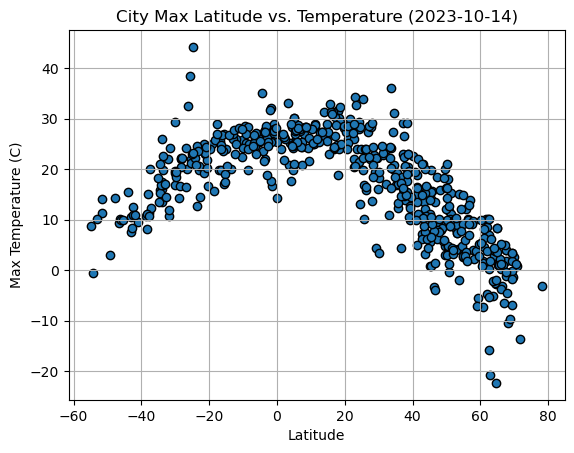

<Figure size 640x480 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
citylat = city_data_df["Lat"]
citytemp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(citylat, citytemp,edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-10-14)")
plt.grid(visible=True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

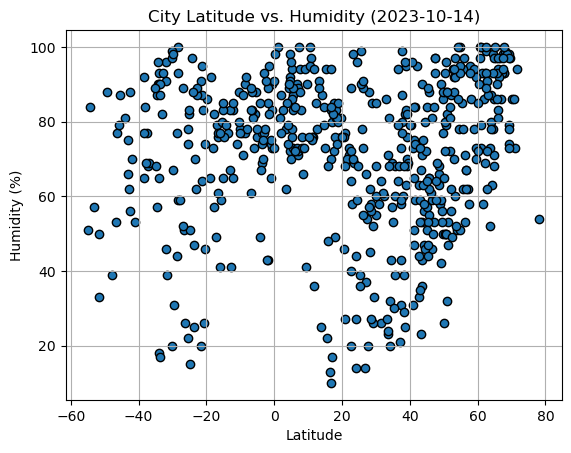

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
cityhumid = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(citylat, cityhumid,edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-14)")
plt.grid(visible=True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

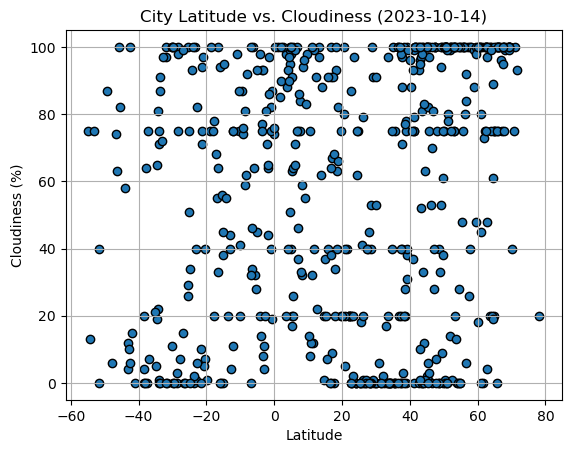

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
citycloud = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(citylat, citycloud,edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-14)")
plt.grid(visible=True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

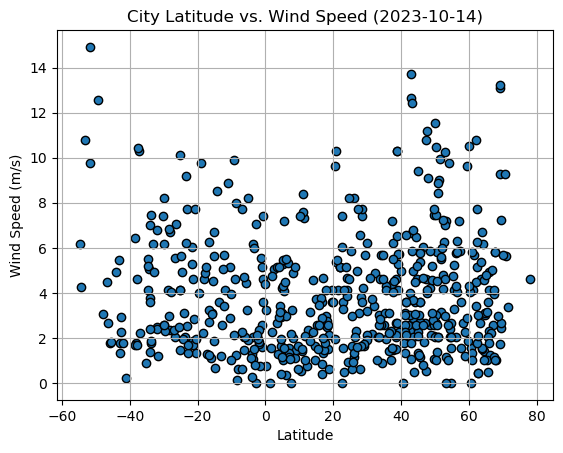

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
citywind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(citylat, citywind,edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-10-14)")
plt.grid(visible=True)
plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def placelineregress(xaxis, yaxis, xtitle, ytitle, anno_coordinates):
    x_values = xaxis
    y_values = yaxis
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,anno_coordinates,fontsize=15,color="red")
    plt.show()
    print(f"The r-value is {rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,1.71,98,100,3.95,RU,1697491448
1,yellowknife,62.4560,-114.3525,6.90,99,100,5.14,CA,1697491952
3,wailua homesteads,22.0669,-159.3780,28.44,71,20,5.14,US,1697491953
6,albany,42.6001,-73.9662,15.36,63,93,2.30,US,1697491842
8,constantia,44.1833,28.6500,6.50,56,12,3.61,RO,1697491423


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.99,88,87,12.57,TF,1697491952
4,hermanus,-34.4187,19.2345,15.77,90,22,5.06,ZA,1697491953
5,queenstown,-31.8976,26.8753,10.67,91,97,2.50,ZA,1697491404
7,adamstown,-25.0660,-130.1015,21.91,82,51,4.11,PN,1697491955
9,tual,-5.6667,132.7500,26.60,82,32,4.45,ID,1697491955


###  Temperature vs. Latitude Linear Regression Plot

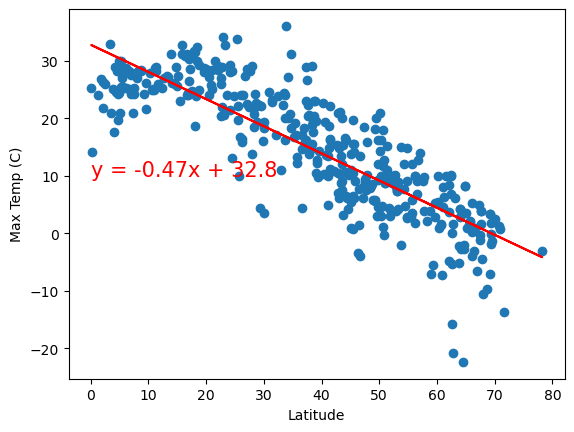

The r-value is -0.8469314944689202


In [16]:
# Linear regression on Northern Hemisphere
placelineregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)", (0,10))

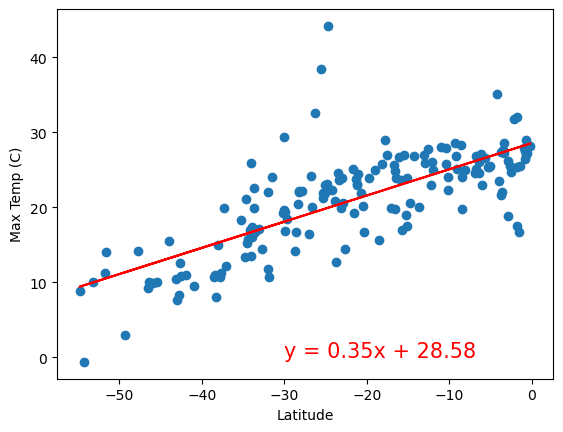

The r-value is 0.7382724455168095


In [17]:
# Linear regression on Southern Hemisphere
placelineregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp (C)",(-30,0))

**Discussion about the linear relationship:** As you get closer to the equator (0 latitude), the max recorded temperature in a given city goes up. The further you are from the equator, the colder the max recorded temperature. The r values in both the northern and southern hemispheres suggest there is a strong relationship between max temperature and how close to the equator you are.

### Humidity vs. Latitude Linear Regression Plot

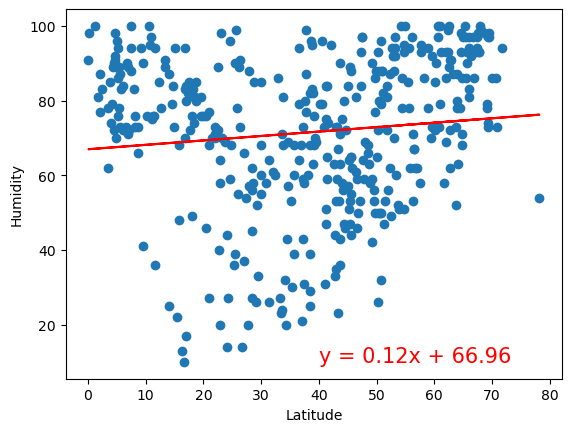

The r-value is 0.11208426884556637


In [18]:
# Northern Hemisphere
placelineregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",(40,10))

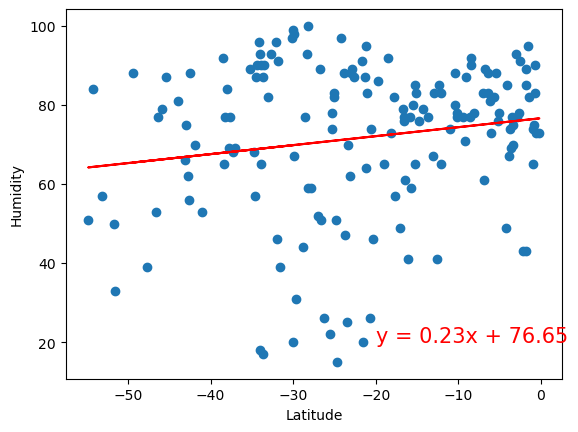

The r-value is 0.16681655241980053


In [19]:
# Southern Hemisphere
placelineregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",(-20,20))

**Discussion about the linear relationship:** There does not appear to be any correlation between humidity and the latitude of a given city.

### Cloudiness vs. Latitude Linear Regression Plot

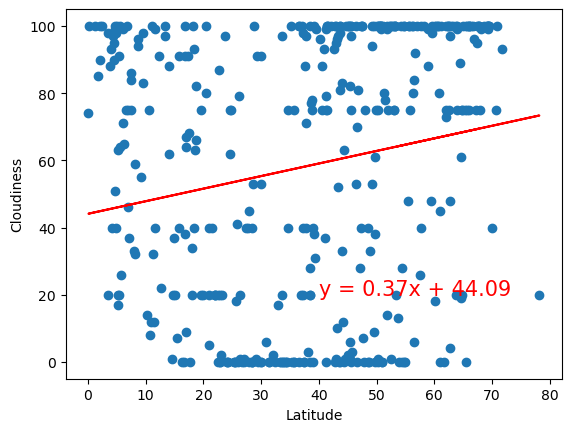

The r-value is 0.1853367973992726


In [20]:
# Northern Hemisphere
placelineregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(40,20))

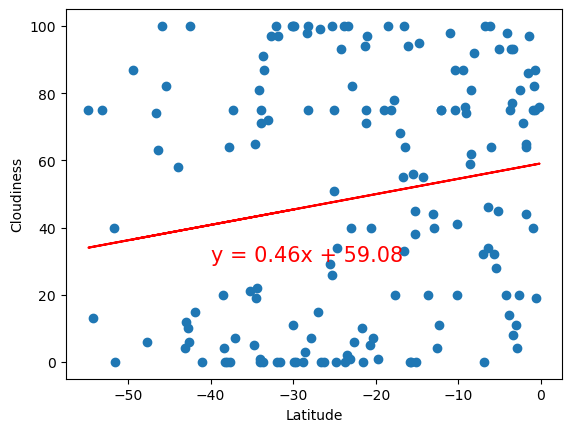

The r-value is 0.17812550487033416


In [21]:
# Southern Hemisphere
placelineregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(-40,30))

**Discussion about the linear relationship:** There does not appear to be any correlation between cloudiness and the latitude of a given city.

### Wind Speed vs. Latitude Linear Regression Plot

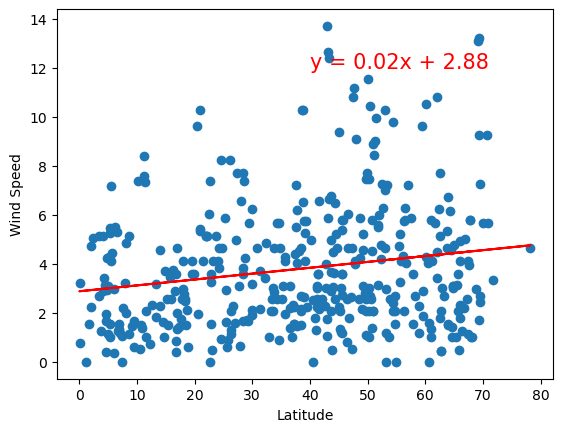

The r-value is 0.18114738048900494


In [22]:
# Northern Hemisphere
placelineregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(40,12))

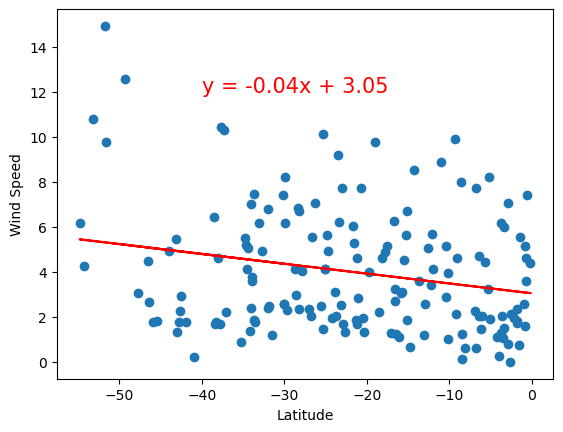

The r-value is -0.22732686715329478


In [23]:
# Southern Hemisphere
placelineregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(-40,12))

**Discussion about the linear relationship:** There does not appear to be a correlation between wind speed and the latitude of a given city.